# Phys 453: Gaussian Wavepacket 

Given the state of a system at $t=0$, how will the system evolve over time?  This is one of the most fundamental and important questions one can ask in physics.  Afterall, the point of a theory is to make predictions that an experiment can test.  In quantum mechanics the state of a system  at $t=0$ is given by the wavefunction, $\Psi(x,0)$, and in order to make predictions we need some way to calculate the wavefunction at other times, $\Psi(x,t)$.   This allows us to make predictions like: 
1. How likely is the particle to stay in a particular place?  
2. How does the system respond to perturbations?
3. How do observables like energy, spin, momentum, magnetization, etc. change in time?

As described in Griffiths, Section 2.4, and explored in Griffiths Problem 2.22, one convenient way of obtaining $\Psi(x,t)$ from $\Psi(x,0)$ for a free particle is via Fourier Transforms. The logic goes like this - we know that the energy eigenstates of the free particle are given by plane waves, and are characterized by a momentum, $k$.
$$\Psi_k(x,t) \approx \exp\left( i(kx-\frac{\hbar k^2}{2m}t)\right), \; E_k=\frac{\hbar^2 k^2}{2m}$$
So at $t=0$, we have a complete set of states, $\Psi_k(x,0)$, for which we can easily add their time dependence and that we can superimpose to create any other arbitrary state, $\Psi(x,0)$.  If the weight of eigenstate $\Psi_k=e^{ikx}$ in the superposition is $\phi(k)$, then we can write the superposition as
$$\Psi(x,0)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\phi(k)e^{ikx}dk$$
Given $\Psi(x,0)$, the goal is then to find $\phi(k)$, which can be done via a Fourier Transform
$$\phi(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\Psi(x,0)e^{-ikx}dx$$
Once we know $\phi(k)$, the Fourier Transform of $\Psi(x,0)$, we can easily add on the time dependence of each eigenstate and transform back to obtain $\Psi(x,t)$.
$$\Psi(x,t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\phi(k)e^{ i(kx-\frac{\hbar k^2}{2m}t)}dk$$
So, the recipe of calculating $\Psi(x,t)$ from $\Psi(x,0)$ is
1. Fourier transform $\Psi(x,0)$ to get $\phi(k)$
2. Add on the time-dependence, $\phi(k,t)=\phi(k)e^{ i\frac{\hbar k^2}{2m}t}$
3. Inverse Fourier Transform $\phi(k,t)$ to get $\Phi(x,t)$

One good example of this procedure is the time evolution of a Gaussian wavepacket. Griffiths Problem 2.22 shows you how to do this analytically, and this notebook will teach you how to do it computationally.  The Gaussian wavepacket provides a good testing ground, but a nice thing about the computational solution is that it can be applied to any initial $\Psi(x,0)$. This is quite valuable, since the integrals involved in the analytic solution are typically quite difficult, usually unsolvable, for anything more complex than a Gaussian. 


## Time Evolution of a Gaussian Wavepacket

Our $\Psi(x,0)$ will be given by a Gaussian,
$$\Psi(x,0) = Ae^{-ax^2}$$
We'll set $a=m=\hbar=1$.  Our domain for the computational solution will be a grid from $x=-20$ to $x=20$, with 400 grid points.  I'll start you off by loading the necessary libraries, making the grid in $x$ and $k$, and defining $\Psi(x,0)$.

In [1]:
%matplotlib notebook   
import matplotlib.pyplot as plt 
import numpy    

In [2]:
N=400      #Number of grid points
L=20
dx = 2.*L/N
x = numpy.arange(-L,L,dx)   #Define a grid from x=-L to x=L, with spacing 2L/N 
x_exact = numpy.arange(-L,L,4*dx)  #Sparser grid, used only by animation, to plot exact solution (so that you can see the exact and numerical solutions)
a=1
m=1
hbar=1
psi_0 = numpy.exp(-a*x**2)
psi_0 = psi_0 / numpy.sqrt(dx*sum(numpy.conjugate(psi_0)*psi_0))

### Question 1
In Griffiths Problem 2.22, the exact solution for the time evolution of this Gaussian is found.  Use that solution to finish this function, which takes $a$, the grid $x$, and the time $t$ and returns $\Psi_{exact}(x,t)$.

In [3]:
def exact_solution(a, x, t):
    return (2*a/numpy.pi)**(1./4)*numpy.exp(-a*x*x/(1+2*1j*a*t))/numpy.sqrt(1+2*1j*a*t) #Fill in the exact solution

### Question 2
In order to apply the time dependence to the wavefunction, you need to know the momenta, $k$, for each eigenstate in the superposition.  Only then will you be able to calculate the phase factor in $\phi(k,t)=\phi(k)e^{ i\frac{\hbar k^2}{2m}t}$.  Use the fftfreq function to get an array of these momenta.

In [4]:
k = 2*numpy.pi*numpy.fft.fftfreq(N,d=dx)   #Get the momenta used by the FFT function

### Question 3
Now the real heart of the problem.  Finish this function that returns $\Psi(x,t)$, given $k$, $\Psi(x,0)$, and the time $t$. Do this by using the numpy fft and ifft routines to calculate $\phi(k)$, then $\phi(k,t)=\phi(k)e^{ -i\frac{\hbar k^2}{2m}t}$, and finally transform back to get $\Psi(x,t)$.  

Note: I've calculated $\phi(k)$ for you!  You only need to finish the two lines for $\phi(k,t)$ and $\Psi(x,t)$.

In [5]:
def time_evolve(k, psi_x, t):
    psi_k = numpy.fft.fft(psi_x)               #Transform into momentum space
    psi_k_t = psi_k*numpy.exp(-1j*k*k/2*t)     #Apply the time dependence
    psi_x_t = numpy.fft.ifft(psi_k_t)          #Transform back into real space
    return psi_x_t

### Question 4
Alright, now I'm going to use your functions to animate the time evolution of the Gaussian wavepacket.  You'll see the real and imaginary parts of the wavefunction, as well as the probability density, $|\Psi(x,t)|^2$.  The dots are the exact solution, and the lines are the numerical solution.  

Below the graphs, comment on the following:
1. Do the analytical and numerical solutions agree?
2. Do you think the animation is accurate for all times? Why or why not?

Tip: In the animation code, there is a variable "time per frame" that you can increase or descrease to speed up or slow down the animation.

<IPython.core.display.Javascript object>


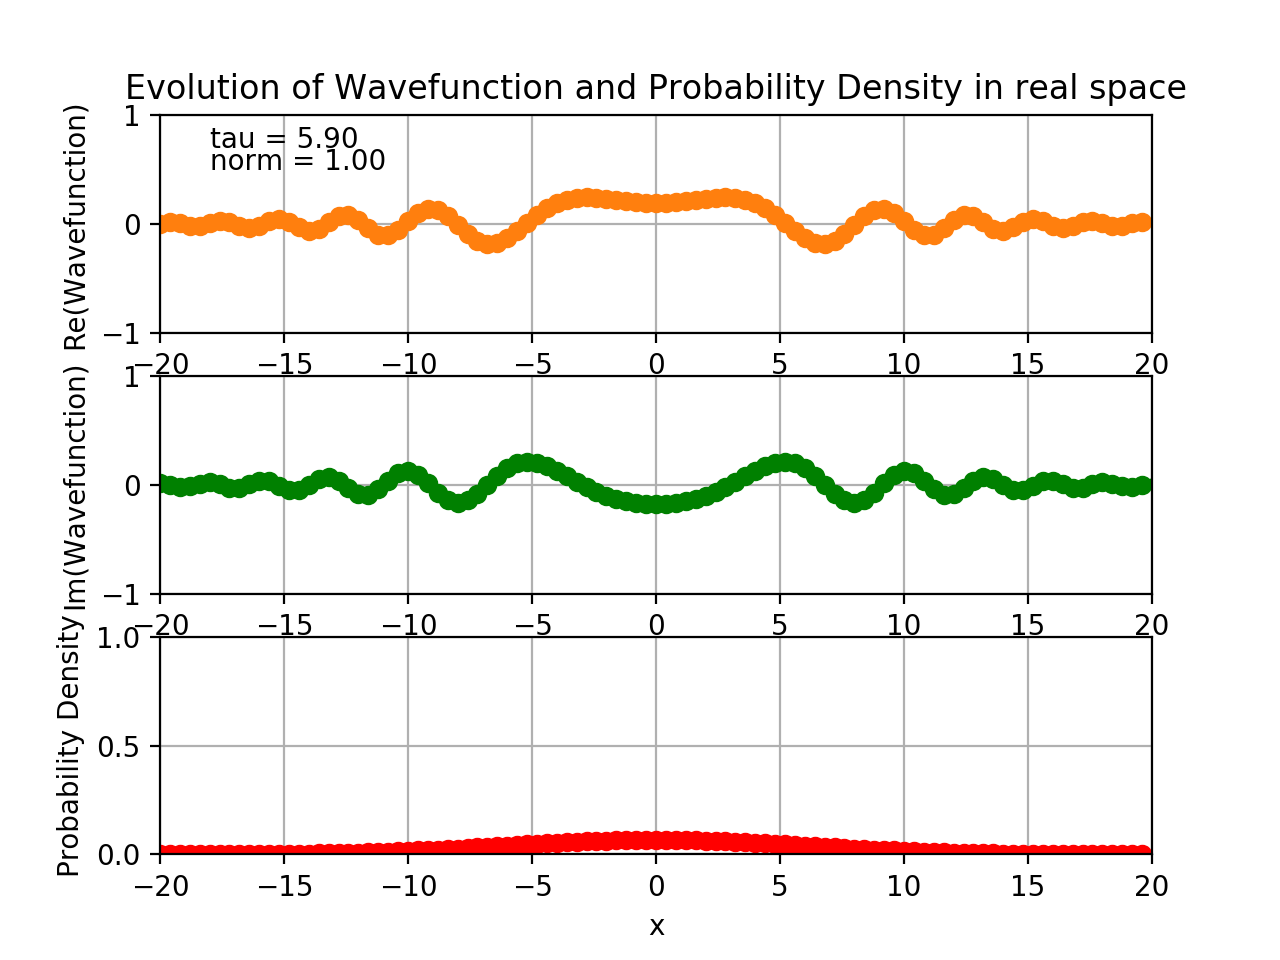

In [6]:
import matplotlib.animation as animation
  
# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line4, = ax1.plot([], [], 'o')
line2, = ax2.plot([], [], lw=2, color='g')
line5, = ax2.plot([], [], 'o', color='g')
line3, = ax3.plot([], [], lw=2, color='r')
line6, = ax3.plot([], [], 'o', color='r')
line = [line1, line2, line3, line4, line5, line6]

# the same axes initalizations as before (just now we do it for both of them)
ax1.set_ylim(-1,1)
ax1.set_xlim(-L, L)
ax1.grid()
ax1.set_ylabel("Re(Wavefunction)")
ax1.set_title("Evolution of Wavefunction and Probability Density in real space")

ax2.set_ylim(-1,1)
ax2.set_xlim(-L, L)
ax2.grid()
ax2.set_ylabel("Im(Wavefunction)")

ax3.set_ylim(0, 1)
ax3.set_xlim(-L, L)
ax3.grid()
ax3.set_xlabel("x")
ax3.set_ylabel("Probability Density")

time_text = ax1.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
norm_text = ax1.text(0.05, 0.85,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
time_per_frame = 0.1     # You could change this to make the animation faster or slower

def run_init():
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    return line,
    
def run(i):
    wf = time_evolve(k, psi_0, time_per_frame*i)
    wf_exact = exact_solution(a, x_exact, time_per_frame*i)
    y1data = numpy.real(wf)
    y2data = numpy.imag(wf)
    y3data = numpy.conjugate(wf)*wf
    
    y1data_exact = numpy.real(wf_exact)
    y2data_exact = numpy.imag(wf_exact)
    y3data_exact = numpy.conjugate(wf_exact)*wf_exact

    # update the data of the three line objects
    line[0].set_data(x, y1data)
    line[1].set_data(x, y2data)
    line[2].set_data(x, y3data)
    line[3].set_data(x_exact, y1data_exact)
    line[4].set_data(x_exact, y2data_exact)
    line[5].set_data(x_exact, y3data_exact)
    #Display the current animation time
    time_text.set_text('tau = %.2f' % (i*time_per_frame))
    norm_text.set_text('norm = %.2f' % (dx*sum(numpy.conjugate(wf)*wf)))
    return line, time_text, norm_text

ani = animation.FuncAnimation(fig, run, init_func=run_init,
                               frames=1000, interval=20, blit=True)
    
plt.show()